In [1]:
# Unzip

import zipfile
from pathlib import Path

# 현재 디렉토리 기준 경로
afac_zip = Path("AFAC.zip")
dogage_zip = Path("DogAge.zip")

# 압축 해제 디렉토리
afac_dir = Path("AFAC")
dogage_dir = Path("DogAge")

# AFAC 압축 해제
with zipfile.ZipFile(afac_zip, "r") as zip_ref:
    zip_ref.extractall(afac_dir)
print(f"✅ AFAC dataset extracted to {afac_dir.resolve()}")

# DogAge 압축 해제
with zipfile.ZipFile(dogage_zip, "r") as zip_ref:
    zip_ref.extractall(dogage_dir)
print(f"✅ DogAge dataset extracted to {dogage_dir.resolve()}")

✅ AFAC dataset extracted to /teamspace/studios/this_studio/AFAC
✅ DogAge dataset extracted to /teamspace/studios/this_studio/DogAge


In [2]:
# merge train, val

import os
import shutil

# 경로
train_txt_path = 'AFAC/annotations/train.txt'
val_txt_path = 'AFAC/annotations/val.txt'
trainset_dir = 'AFAC/trainset'
valset_dir = 'AFAC/valset'

# 1. val.txt 내용을 train.txt에 append
with open(train_txt_path, 'a') as train_file, open(val_txt_path, 'r') as val_file:
    train_file.write('\n')  # 줄바꿈 추가 (혹시 마지막 줄이 \n 없을 경우)
    train_file.writelines(val_file.readlines())

print("✅ AFAC/annotations/train.txt에 val.txt 병합 완료")

# 2. valset 디렉토리의 파일들을 trainset 으로 복사
val_images = os.listdir(valset_dir)
for fname in val_images:
    src = os.path.join(valset_dir, fname)
    dst = os.path.join(trainset_dir, fname)
    if not os.path.exists(dst):  # 중복 방지
        shutil.copy2(src, dst)

print(f"✅ AFAC/trainset/ 에 {len(val_images)}개의 이미지 복사 완료")

✅ AFAC/annotations/train.txt에 val.txt 병합 완료
✅ AFAC/trainset/ 에 3000개의 이미지 복사 완료


❗ 잘못된 라인 무시: 
✅ 클래스 분포:
Young: 5114개
Senior: 6618개
Adult: 11268개


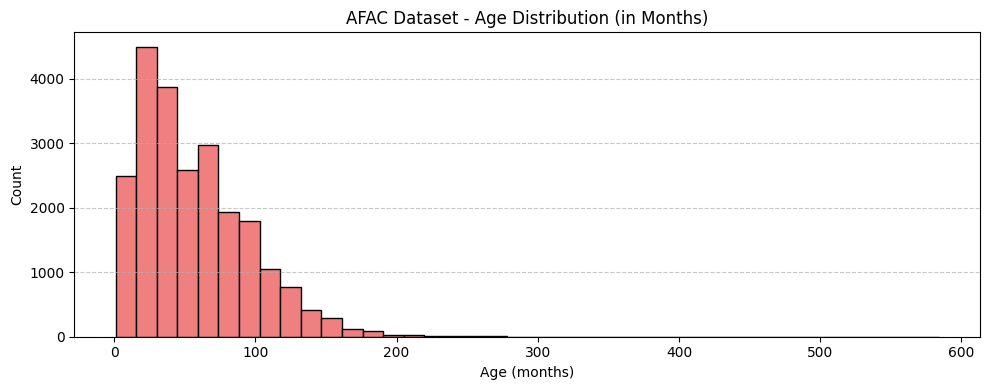

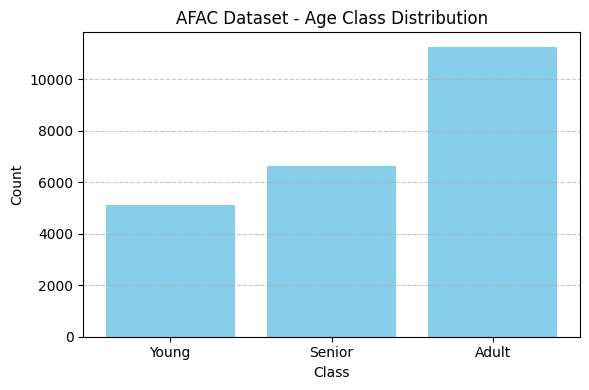

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

# 나이 → 클래스 변환 함수
def age_to_class(age_months):
    if age_months <= 24:
        return "Young"
    elif age_months <= 72:
        return "Adult"
    else:
        return "Senior"

# 파일 경로
txt_path = 'AFAC/annotations/train.txt'

# 나이 및 클래스 리스트 생성
age_list = []
age_classes = []

with open(txt_path, 'r') as f:
    for line in f:
        try:
            _, age_str = line.strip().split()
            age = int(age_str)
            age_list.append(age)
            age_classes.append(age_to_class(age))
        except:
            print(f"❗ 잘못된 라인 무시: {line.strip()}")

# 클래스 카운트
class_counts = Counter(age_classes)

# ✅ 1. 클래스 분포 출력
print("✅ 클래스 분포:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}개")

# ✅ 2. 나이 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 4))
plt.hist(age_list, bins=40, color='lightcoral', edgecolor='black')
plt.title("AFAC Dataset - Age Distribution (in Months)")
plt.xlabel("Age (months)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ✅ 3. 클래스 분포 시각화 (막대그래프)
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("AFAC Dataset - Age Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
from collections import Counter

# Age → Class 매핑
def age_to_class(age_months):
    if age_months <= 24:
        return "Young"
    elif age_months <= 72:
        return "Adult"
    else:
        return "Senior"

# 경로 설정
afac_annotation_path = "AFAC/annotations/train.txt"
afac_txt_save_path = "AFAC/AFAC.txt"

# 결과 저장용 리스트
afac_records = []
age_classes = []

with open(afac_annotation_path, 'r') as f:
    for line in f:
        try:
            filename, age_str = line.strip().split()
            age = int(age_str)
            label = age_to_class(age)
            afac_records.append((filename, label))
            age_classes.append(label)
        except:
            print(f"❗ 잘못된 라인 무시됨: {line.strip()}")

# 저장
with open(afac_txt_save_path, "w") as f:
    for filename, label in afac_records:
        f.write(f"{filename}\t{label}\n")

print(f"✅ Saved {len(afac_records)} records to {afac_txt_save_path}")

# 클래스 분포 출력
label_counts = Counter(age_classes)
print("\n📊 AFAC Dataset Class Distribution:")
for cls in ["Young", "Adult", "Senior"]:
    print(f"{cls}: {label_counts[cls]}개")

❗ 잘못된 라인 무시됨: 
✅ Saved 23000 records to AFAC/AFAC.txt

📊 AFAC Dataset Class Distribution:
Young: 5114개
Adult: 11268개
Senior: 6618개


In [7]:
import os

dogage_txt_path = "DogAge/DogAge.txt"

if os.path.exists(dogage_txt_path):
    os.remove(dogage_txt_path)
    print(f"🗑️ Removed existing {dogage_txt_path}")
else:
    print(f"⚠️ {dogage_txt_path} does not exist.")

🗑️ Removed existing DogAge/DogAge.txt


In [8]:
# DogAge.txt 생성

import os
from glob import glob
from collections import Counter

# 경로 설정
expert_root = "DogAge/Expert_Train/Expert_TrainEval"
petfinder_root = "DogAge/PetFinder_All/PetFinder_All"
save_txt_path = "DogAge/DogAge.txt"
classes = ["Young", "Adult", "Senior"]

# 모든 (filename, label) 쌍 수집
dogage_records = []

for label in classes:
    # Expert
    expert_paths = glob(os.path.join(expert_root, label, "*.jpg"))
    for path in expert_paths:
        filename = os.path.basename(path)
        dogage_records.append((filename, label))

    # PetFinder
    petfinder_paths = glob(os.path.join(petfinder_root, label, "*.jpg"))
    for path in petfinder_paths:
        filename = os.path.basename(path)
        dogage_records.append((filename, label))

# DogAge.txt로 저장
with open(save_txt_path, "w") as f:
    for filename, label in dogage_records:
        f.write(f"{filename}\t{label}\n")

print(f"✅ Saved {len(dogage_records)} records to {save_txt_path}")

# 클래스 분포 확인
labels = [label for _, label in dogage_records]
label_counts = Counter(labels)

print("\n📊 DogAge Dataset Class Distribution:")
for cls in classes:
    print(f"{cls}: {label_counts[cls]}개")

✅ Saved 26980 records to DogAge/DogAge.txt

📊 DogAge Dataset Class Distribution:
Young: 8998개
Adult: 15355개
Senior: 2627개


In [2]:
import os
from collections import Counter

# 경로 설정
dogage_txt_path = "DogAge/DogAge.txt"
afac_txt_path = "AFAC/AFAC.txt"
merged_txt_path = "data.txt"  # 저장할 최종 파일 이름

# 🔹 Helper: txt 로드 (탭 기준 split, 잘못된 라인 무시)
def load_records(txt_path):
    records = []
    filenames = set()
    with open(txt_path, 'r') as f:
        for line in f:
            try:
                filename, label = line.strip().split('\t')  # ✅ 탭 문자로 분리
                records.append((filename, label))
                filenames.add(filename)
            except:
                print(f"⚠️ 잘못된 라인 무시됨: {line.strip()}")
    return records, filenames

# 🔸 1. Load 두 데이터셋
afac_records, afac_filenames = load_records(afac_txt_path)
dogage_records, dogage_filenames = load_records(dogage_txt_path)

# 🔸 2. 중복 제거 (AFAC 우선 보존)
dogage_unique = [(f, l) for (f, l) in dogage_records if f not in afac_filenames]

# 🔸 3. 병합
merged_records = afac_records + dogage_unique

# 🔸 4. 저장
with open(merged_txt_path, "w") as f:
    for filename, label in merged_records:
        f.write(f"{filename}\t{label}\n")

print(f"\n✅ 최종 {len(merged_records)}개 이미지가 {merged_txt_path}에 저장되었습니다.")

# 🔸 5. 중복 수
num_overlap = len(dogage_records) - len(dogage_unique)
print(f"\n⚠️ 중복된 파일명: {num_overlap}개 → DogAge에서 제거됨")

# 🔸 6. 클래스 분포 출력
labels = [label for _, label in merged_records]
label_counts = Counter(labels)

print("\n📊 전체 클래스 분포:")
for cls in ["Young", "Adult", "Senior"]:
    print(f"{cls}: {label_counts[cls]}개")


✅ 최종 49980개 이미지가 data.txt에 저장되었습니다.

⚠️ 중복된 파일명: 0개 → DogAge에서 제거됨

📊 전체 클래스 분포:
Young: 14112개
Adult: 26623개
Senior: 9245개


In [1]:
"""
🔍 Domain Gap 분석 및 실험 설정

AFAC Dataset과 DogAge Dataset은 강아지 이미지 생성 및 나이 변환 학습에 사용될 수 있으나, 두 도메인 간에는 다음과 같은 차이로 인해 **Domain Gap**이 존재함:

1. 🎨 **종 다양성 (Breed Diversity)**  
    - AFAC: 흰색 계열의 소형견 중심, 특정 종(예: 몰티즈, 푸들류) 비중이 매우 높음  
    - DogAge: 대형견, 중형견, 다양한 무늬/색/체형의 종이 혼재되어 있음  

2. 🖼️ **시각적 일관성 (Visual Consistency)**  
    - AFAC: 사진 스타일, 배경, 촬영 거리, 밝기 등이 비교적 uniform  
    - DogAge: 입양, 실외, 클리닉, 보호소 등 다양한 환경에서 촬영되어 품질 및 구도가 매우 다양함  

4. 🧠 **실험 설계 전략**  
    - 초기 모델은 **AFAC 단일 도메인으로 학습하여 노화 표현 및 identity 보존 능력을 평가**  
    - 필요 시, **"AFAC vs DogAge" 도메인 자체를 조건 (condition)으로 넣어 disentanglement 실험** 가능

따라서 현재 실험에서는 AFAC Dataset만을 사용하여 모델을 학습하고, domain bias를 제거한 안정적인 노화 모델을 구축하는 것을 1차 목표로 설정함.
"""

'\n🔍 Domain Gap 분석 및 실험 설정\n\nAFAC Dataset과 DogAge Dataset은 강아지 이미지 생성 및 나이 변환 학습에 사용될 수 있으나, 두 도메인 간에는 다음과 같은 차이로 인해 **Domain Gap**이 존재함:\n\n1. 🎨 **종 다양성 (Breed Diversity)**  \n    - AFAC: 흰색 계열의 소형견 중심, 특정 종(예: 몰티즈, 푸들류) 비중이 매우 높음  \n    - DogAge: 대형견, 중형견, 다양한 무늬/색/체형의 종이 혼재되어 있음  \n\n2. 🖼️ **시각적 일관성 (Visual Consistency)**  \n    - AFAC: 사진 스타일, 배경, 촬영 거리, 밝기 등이 비교적 uniform  \n    - DogAge: 입양, 실외, 클리닉, 보호소 등 다양한 환경에서 촬영되어 품질 및 구도가 매우 다양함  \n\n4. 🧠 **실험 설계 전략**  \n    - 초기 모델은 **AFAC 단일 도메인으로 학습하여 노화 표현 및 identity 보존 능력을 평가**  \n    - 필요 시, **"AFAC vs DogAge" 도메인 자체를 조건 (condition)으로 넣어 disentanglement 실험** 가능\n\n따라서 현재 실험에서는 AFAC Dataset만을 사용하여 모델을 학습하고, domain bias를 제거한 안정적인 노화 모델을 구축하는 것을 1차 목표로 설정함.\n'